In [12]:
%inline pylab
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

UsageError: Line magic function `%inline` not found.


In [2]:
tracker = cv2.TrackerMIL_create()

In [7]:
video = cv2.VideoCapture('../videos/vid.mp4')

if not video.isOpened():
    print("Could not open video")

In [8]:
ok, frame = video.read()
if not ok:
    print('Cannot read video file')

In [48]:
ok, frame2 = video.read()
if not ok:
    print('Cannot read video file')

In [56]:
diff = cv2.absdiff(frame, frame2)

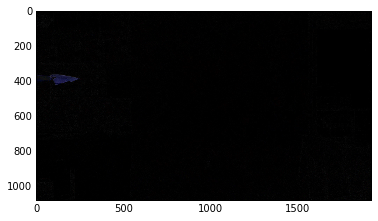

In [57]:
plt.figure()
plt.imshow(diff)

In [9]:
start = time.time()

try:
    for i in range(12):
        # Read a new frame
        ok, frame2 = video.read()
        
        if not ok:
            print('not ok')
            break
        
        diff = cv2.absdiff(frame2, frame)

        
            
        # Turn off the axis
        #axis('on')
        # Title of the window
        #title("Input Stream")
        # Display the frame
        #imshow(diff)
        #show()
        # Display the frame until new frame is available
        #clear_output(wait=True)
        
        frame = frame2
        
except KeyboardInterrupt:
    # Release the Video Device
    video.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")



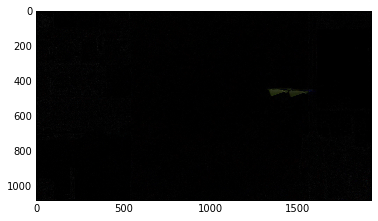

In [10]:
plt.figure()
plt.imshow(diff)

im = frame.copy()

bbox = (150, 350, 150, 70)
cv2.rectangle(im, (100, 350), (250, 420), (0, 255, 0), 5)

plt.figure()
plt.imshow(im)

In [ ]:
ok = tracker.init(frame, bbox)

try:
    while True:
        # Read a new frame
        ok, frame = video.read()
        print('read')

        if not ok:
            print('not ok')
            break

        # Start timer
        timer = cv2.getTickCount()

        # Update tracker
        ok, bbox = tracker.update(frame)
        print(bbox)
        
        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0,255,0), 5, 1)
            print(bbox)
        else :
            # Tracking failure
            print('fail')
            #cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

        # Display tracker type on frame
        #cv2.putText(frame, "MIL Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);

        # Display FPS on frame
        #cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);

        # Turn off the axis
        axis('on')
        # Title of the window
        title("Input Stream")
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    video.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

import cv2
import sys
 
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')￼
 
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
 
    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']
    tracker_type = tracker_types[2]
 
    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
 
    # Read video
    video = cv2.VideoCapture("videos/chaplin.mp4")
 
    # Exit if video not opened.
    if not video.isOpened():
        print "Could not open video"
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print 'Cannot read video file'
        sys.exit()
     
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)
 
    # Uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame, False)
 
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
 
    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
         
        # Start timer
        timer = cv2.getTickCount()
 
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);
 
        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
 
        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
     
        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break